<a href="https://colab.research.google.com/github/hsaurs/Projects/blob/main/AI_06_%EC%9C%A0%ED%98%95%EC%84%9D_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.xlsx to vgames2.xlsx


In [4]:
df = pd.read_excel('vgames2.xlsx')

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K',''))* (1/1000)
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M',''))

In [7]:
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [9]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [10]:
def year(x):
    if ((x <= 16)&(x>=0.0)):
        return 2000 + x
    elif ((x >= 86)&(x<=98)):
        return 1900 + x
    else:
        return x

In [11]:
df['Year'] = df['Year'].apply(year)

In [13]:
df = df.dropna()

In [15]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [14]:
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [8]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']

In [78]:
dfg = df.groupby('Genre').sum()
dfg = dfg.drop(['Year'],axis=1)
NA = dfg['NA_Sales']
EU = dfg['EU_Sales']
JP = dfg['JP_Sales']
OT = dfg['Other_Sales']
dfg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,860.03,514.43,158.31,184.79,1717.56
Adventure,102.20,64.58,51.90,16.81,235.49
Fighting,220.74,100.00,87.15,36.19,444.08
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.76,50.47,56.29,12.45,240.97
Racing,356.90,236.31,56.61,76.68,726.50
Role-Playing,327.46,188.32,350.55,59.74,926.07
Shooter,574.58,310.23,38.18,101.87,1024.86


In [ ]:
## 판매량과 게임 선호도가 비례한다 가정했을 때 지역 별 선호 게임 장르가 다르다.

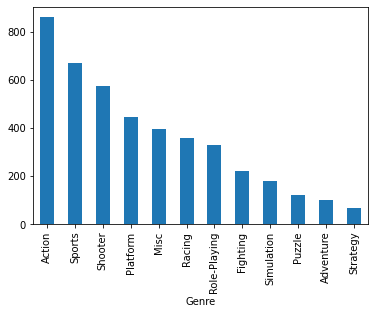

In [90]:
NA.sort_values(ascending=False).plot.bar()
plt.show()

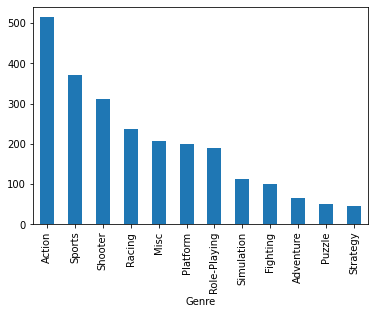

In [88]:
EU.sort_values(ascending=False).plot.bar()
plt.show()

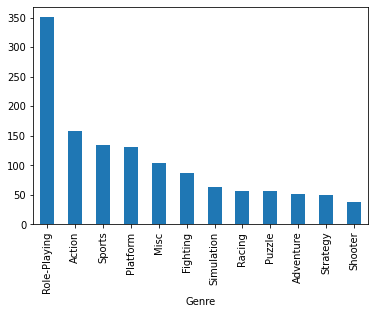

In [89]:
JP.sort_values(ascending=False).plot.bar()
plt.show()

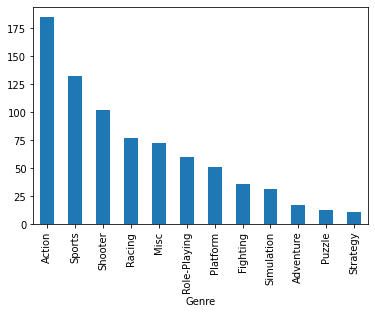

In [91]:
OT.sort_values(ascending=False).plot.bar()
plt.show()

In [35]:
dfg1 = dfg
dfg1 = dfg1.drop(['Total_Sales'],axis=1)
dfg1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,860.03,514.43,158.31,184.79
Adventure,102.20,64.58,51.90,16.81
Fighting,220.74,100.00,87.15,36.19
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.76,50.47,56.29,12.45
Racing,356.90,236.31,56.61,76.68
Role-Playing,327.46,188.32,350.55,59.74
Shooter,574.58,310.23,38.18,101.87


In [114]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(dfg1)
p

3.696754422481658e-123

In [39]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [106]:
dfy.columns

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64', name='Year')

In [140]:
dfy

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,8,20,31,44,39,44,67,126,144,125,192,184,210,220,272,227,239,263,148,186,253,118
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,17,14,23,20,16,21,42,12,38,42,71,84,168,142,153,107,57,60,75,55,33
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,22,29,30,28,41,24,29,18,54,44,39,43,55,50,57,53,40,50,29,20,23,21,14
Misc,4,0,1,1,1,0,0,0,0,1,0,1,2,3,6,22,23,12,21,25,20,26,45,53,67,110,109,150,210,207,200,183,38,42,41,39,18
Platform,0,3,5,5,1,4,6,2,4,3,3,6,6,11,11,13,14,18,25,18,24,43,77,87,66,82,54,42,62,28,31,37,11,37,10,14,10
Puzzle,0,2,3,1,3,4,0,0,1,5,2,4,5,3,3,12,9,14,13,6,12,15,20,7,25,33,43,65,64,79,45,44,11,3,7,6,0
Racing,0,1,2,0,3,0,1,0,1,0,2,1,2,2,8,12,22,36,49,49,43,71,103,109,71,77,75,86,82,83,57,64,30,16,27,19,20
Role-Playing,0,0,0,0,0,0,1,3,3,2,2,5,5,9,17,24,28,23,26,33,29,41,54,48,60,71,110,103,112,103,103,95,78,71,90,79,40
Shooter,2,10,5,1,3,1,4,2,1,1,0,3,3,2,11,29,23,27,23,16,20,36,78,73,88,96,69,85,83,91,81,94,48,59,47,34,32


In [139]:
dfy = pd.crosstab(df['Genre'],df['Year'])
dfy = dfy.drop([2017.0],axis=1)
dfy = dfy.drop([2020.0],axis=1)
stat, p, dof, expected = stats.chi2_contingency(dfy)
p

0.0

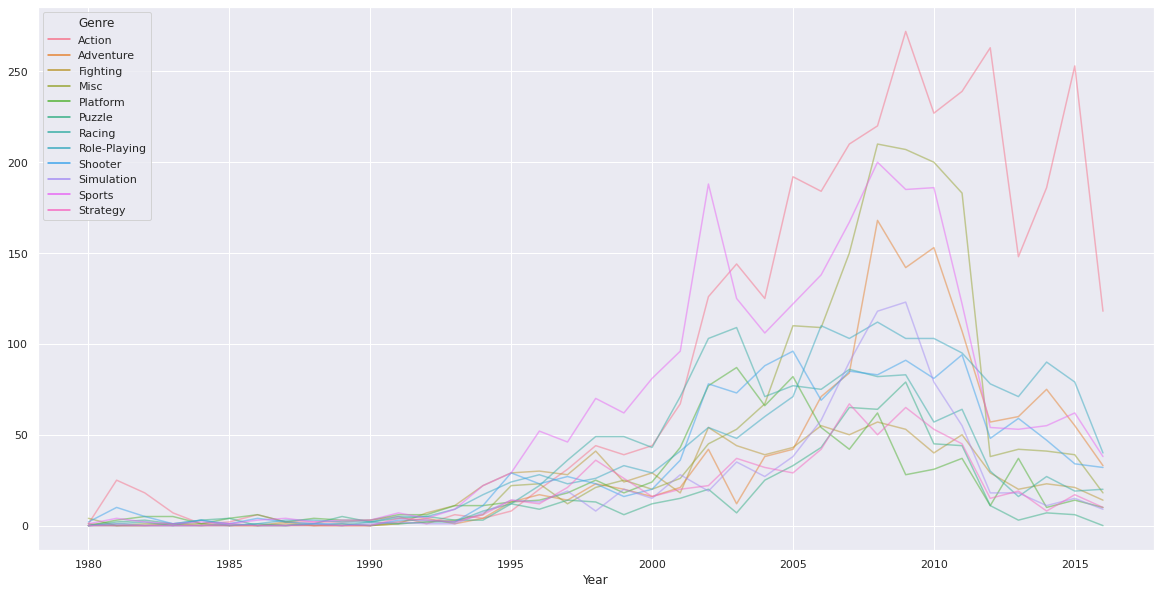

In [164]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=dfy.T,dashes = False, alpha=.5);

In [159]:
dft = df[['Name','Total_Sales']]
df10 = dft.nlargest(10,['Total_Sales'])
index = df10['Name']
df10 = df10.drop(['Name'],axis=1)
df10.index = index
df10

,Total_Sales
Name,
Wii Sports,82.74
Super Mario Bros.,40.24
Mario Kart Wii,35.83
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.38
Tetris,30.26
New Super Mario Bros.,30.01
Wii Play,29.01
New Super Mario Bros. Wii,28.61


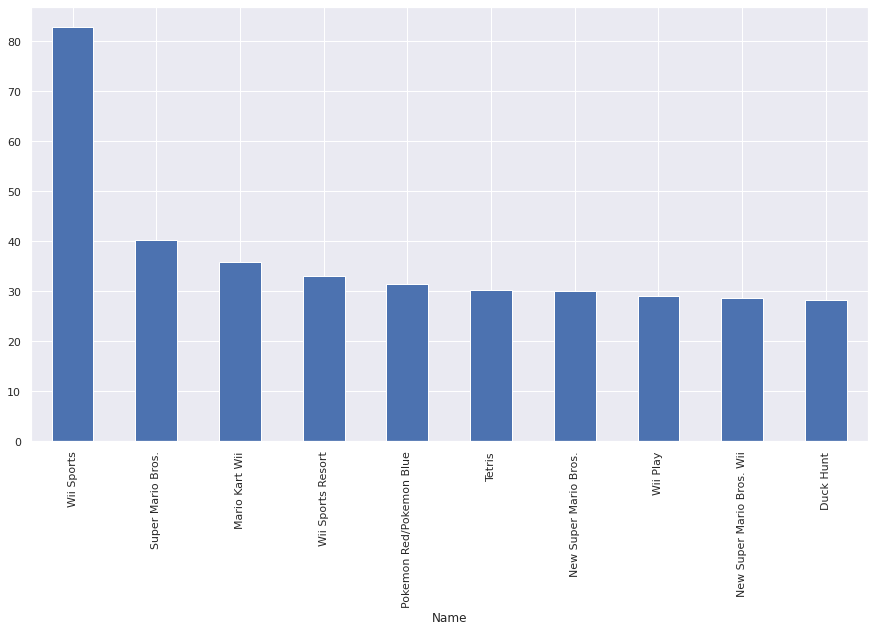

In [160]:
df10['Total_Sales'].plot.bar()
plt.show()

In [ ]:
## 수익성으로 판단했을 때

<function matplotlib.pyplot.show>

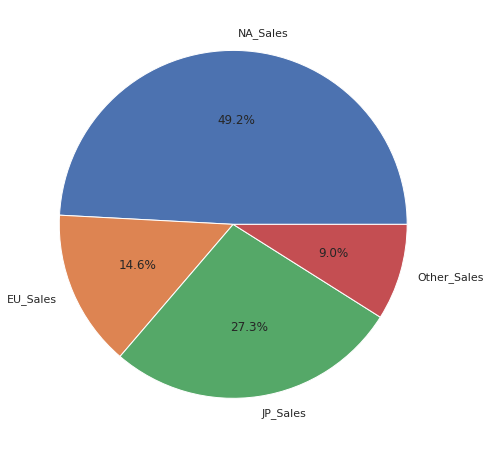

In [136]:
ratio = [df['NA_Sales'].sum(),df['JP_Sales'].sum(),df['EU_Sales'].sum(),df['Other_Sales'].sum()]
labels = df.columns[5:9]
plt.pie(ratio,labels=labels,autopct='%.1f%%');
plt.show
#지역 별 매출 파이그래프

In [ ]:
#판매량 대비 매출 

In [161]:
df1

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,6517647.0,860.03,514.43,158.31,184.79,1717.56
Adventure,2562361.0,102.20,64.58,51.90,16.81,235.49
Fighting,1675871.0,220.74,100.00,87.15,36.19,444.08
Misc,3374273.0,394.73,208.15,104.18,72.64,779.70
Platform,1749321.0,445.38,200.63,130.53,51.45,827.99
Puzzle,1140981.0,121.76,50.47,56.29,12.45,240.97
Racing,2453914.0,356.90,236.31,56.61,76.68,726.50
Role-Playing,2950378.0,327.46,188.32,350.55,59.74,926.07
Shooter,2569586.0,574.58,310.23,38.18,101.87,1024.86


In [ ]:
#트렌드로 판단했을 때

In [ ]:
##최근 10년 간 데이터를 
##대분류(캐주얼,MMORPG)부터 소분류(액션,슈팅 등)까지 장르가 몇 %씩 포함되어 있는 지 나와있는 데이터로
##개발 비용 대비 매출액이 큰 모바일 게임 포함시켜서